In [ ]:
# import the libraries as shown below

import os
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from glob import glob
from tensorflow.keras.layers import Flatten


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/dataset/train1'
valid_path = '/content/drive/MyDrive/dataset/test1'


In [ ]:
# Import the Inception V3 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


87910968/87910968 [==============================] - 6s 0us/step


In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/dataset/train1')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(int(11), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/dataset/train1',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

Found 904 images belonging to 11 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/dataset/test1',
                                            target_size = (224, 224),
                                            batch_size = 16,
                                            class_mode = 'categorical')

Found 904 images belonging to 11 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

<ipython-input-31-2d02736eff38>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/20
57/57 [==============================] - 652s 11s/step - loss: 3.0439 - accuracy: 0.7268 - val_loss: 0.7062 - val_accuracy: 0.9259
Epoch 2/20
57/57 [==============================] - 91s 2s/step - loss: 1.3174 - accuracy: 0.8850 - val_loss: 0.6148 - val_accuracy: 0.9392
Epoch 3/20
57/57 [==============================] - 90s 2s/step - loss: 1.3271 - accuracy: 0.9004 - val_loss: 1.1937 - val_accuracy: 0.9115
Epoch 4/20
57/57 [==============================] - 90s 2s/step - loss: 0.8710 - accuracy: 0.9336 - val_loss: 0.8987 - val_accuracy: 0.9170
Epoch 5/20
57/57 [==============================] - 91s 2s/step - loss: 0.4272 - accuracy: 0.9646 - val_loss: 0.1168 - val_accuracy: 0.9768
Epoch 6/20
57/57 [==============================] - 89s 2s/step - loss: 0.4358 - accuracy: 0.9624 - val_loss: 0.2201 - val_accuracy: 0.9746
Epoch 7/20
57/57 [==============================] - 90s 2s/step - loss: 0.3197 - accuracy: 0.9657 - val_loss: 0.1213 - val_accuracy: 0.9823
Epoch 8/20
57/57 [

In [ ]:
# Evaluate model on test data
test_loss, test_acc = model.evaluate(test_set)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

57/57 [==============================] - 41s 702ms/step - loss: 0.1765 - accuracy: 0.9923
Test loss: 0.176455557346344
Test accuracy: 0.9922566413879395


In [ ]:
import matplotlib.pyplot as plt

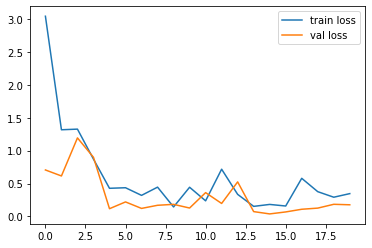

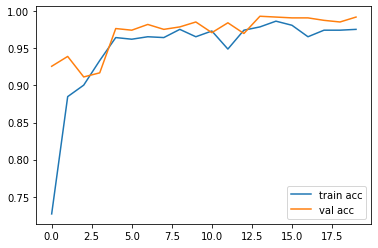

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# Save the trained model to Google Drive
model.save('/content/drive/MyDrive/the og model/finalandlastmodelfood.h5')

In [ ]:
# Define the finalandlast model
finalandlast = keras.models.load_model('/content/drive/MyDrive/the og model/finalandlastmodelfood.h5')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

from PIL import Image
import numpy as np

# Prompt the user to select an image from Google Drive
img_path = '/content/drive/MyDrive/dataset/test1/apple/Image_1.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 224, 224, 3)

# Use the trained model to predict the food class of the image
predictions = finalandlast.predict(img_array)
class_index = np.argmax(predictions)

# Print the predicted class label and its confidence score
class_label = class_labels[class_index]
confidence_score = predictions[0][class_index]
print(f'The image is a {class_label} with a confidence score of {confidence_score}')

1/1 [==============================] - 2s 2s/step
The image is a apple with a confidence score of 1.0


In [ ]:
from PIL import Image
import numpy as np

# Prompt the user to select an image from Google Drive
img_path = '/content/drive/MyDrive/dataset/test1/banana/Image_3.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 224, 224, 3)

# Use the trained model to predict the food class of the image
predictions = trained_model.predict(img_array)
class_index = np.argmax(predictions)

# Print the predicted class label and its confidence score
class_label = class_labels[class_index]
confidence_score = predictions[0][class_index]
print(f'The image is a {class_label} with a confidence score of {confidence_score}')

1/1 [==============================] - 0s 31ms/step
The image is a banana with a confidence score of 1.0


In [ ]:
from PIL import Image
import numpy as np

# Prompt the user to select an image from Google Drive
img_path = '/content/drive/MyDrive/dataset/test1/potato/Image_1.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 224, 224, 3)

# Use the trained model to predict the food class of the image
predictions = trained_model.predict(img_array)
class_index = np.argmax(predictions)

# Print the predicted class label and its confidence score
class_label = class_labels[class_index]
confidence_score = predictions[0][class_index]
print(f'The image is a {class_label} with a confidence score of {confidence_score}')

1/1 [==============================] - 0s 33ms/step
The image is a potato with a confidence score of 1.0


In [ ]:
from PIL import Image
import numpy as np

# Prompt the user to select an image from Google Drive
img_path = '/content/drive/MyDrive/dataset/test1/mango/Image_19.jpg'
img = Image.open(img_path)
img = img.resize((224, 224))
img_array = np.array(img) / 255.0
img_array = img_array.reshape(1, 224, 224, 3)

# Use the trained model to predict the food class of the image
predictions = trained_model.predict(img_array)
class_index = np.argmax(predictions)

# Print the predicted class label and its confidence score
class_label = class_labels[class_index]
confidence_score = predictions[0][class_index]
print(f'The image is a {class_label} with a confidence score of {confidence_score}')

1/1 [==============================] - 0s 31ms/step
The image is a mango with a confidence score of 1.0
